<h2> Object Detection Using Template Matching </h2>
Template Matching simply looks for a smaller cropped picture from a larger image.
Therefore it requires for an exact match of a part of the larger image
There are various algorithms and we'll use all of them

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Read the images
full = cv.imread('DATA/sammy.jpg')
full = cv.cvtColor(full, cv.COLOR_BGR2RGB)

face = cv.imread('DATA/sammy_face.jpg')
face = cv.cvtColor(face, cv.COLOR_BGR2RGB)

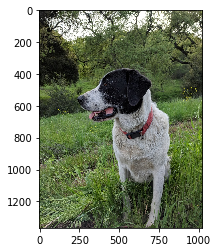

In [2]:
plt.imshow(full)

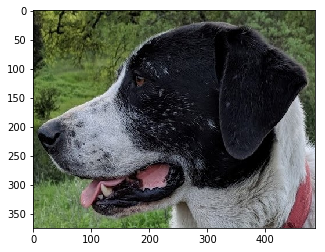

In [3]:
plt.imshow(face)

In [4]:
# methods for template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

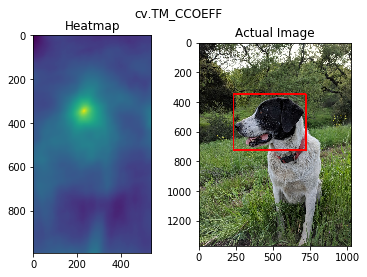

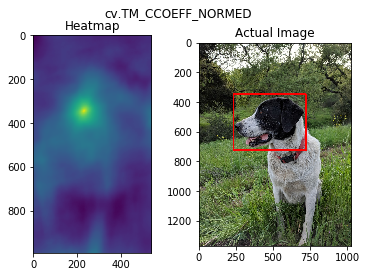

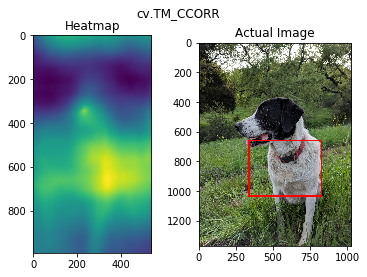

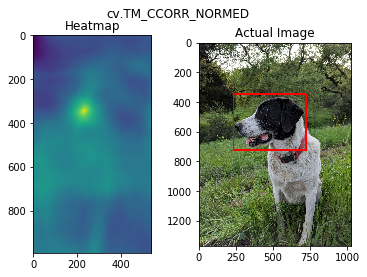

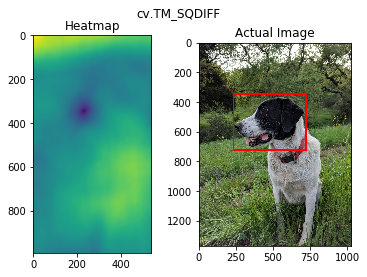

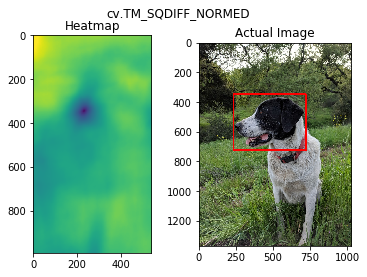

In [5]:
for m in methods:
    
    full_copy = full.copy()
    
    method = eval(m)
    
    res = cv.matchTemplate(full_copy, face, method)
    
    # Draw a sqaure on the full image where template has matched the image
    
    minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(res)
    
    height, width, channels = face.shape
    
    # these methods create heatmaps in which matched locations are of minimum value
    # while for rest of the methods max values are for matched locations
    if m in ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']:
        cv.rectangle(full_copy, minLoc, (minLoc[0]+width, minLoc[1]+height), color=(255,0,0), thickness = 10)
    else:
        cv.rectangle(full_copy, maxLoc, (maxLoc[0]+width, maxLoc[1]+height), color=(255,0,0), thickness = 10)
    
    # Plot the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Actual Image')
    
    plt.suptitle(m)
    plt.show()
    
    print('\n\n')